#AIM : Cost Estimate for Insurance Allowance of DAMAGED CARS

Team Members :
1. Rashmika B (128)
2. Saravana Kumar M (144)
3. Saravanan BL (146)
4. Monika ( 177)
5. Vishvambar Panth S (186)
6. Sethuraman (147)

METHODOLOGY : BASIC CNNs


In [ ]:

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Sequential, optimizers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = 300
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.Sequential([

    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),


    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer

    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('damaged') and 1 for the other ('whole')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
train_dir='/content/drive/MyDrive/Mini Car Dataset/train'
validation_dir='/content/drive/MyDrive/Mini Car Dataset/validation'
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='binary')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='binary'
        )

Found 920 images belonging to 2 classes.
Found 230 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
epochs = 30
e = str(epochs)
filepath="{}e.hdf5".format(str(epochs))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=callbacks_list)

Epoch 1/25
8/8 [==============================] - 301s 42s/step - loss: 1.4453 - accuracy: 0.4959 - val_loss: 0.6904 - val_accuracy: 0.5625

Epoch 00001: val_loss improved from inf to 0.69035, saving model to 25e.hdf5
Epoch 2/25
8/8 [==============================] - 79s 10s/step - loss: 0.6934 - accuracy: 0.4818 - val_loss: 0.6846 - val_accuracy: 0.5125

Epoch 00002: val_loss improved from 0.69035 to 0.68460, saving model to 25e.hdf5
Epoch 3/25
8/8 [==============================] - 67s 9s/step - loss: 0.6870 - accuracy: 0.5364 - val_loss: 0.6672 - val_accuracy: 0.6500

Epoch 00003: val_loss improved from 0.68460 to 0.66722, saving model to 25e.hdf5
Epoch 4/25
8/8 [==============================] - 64s 8s/step - loss: 0.7071 - accuracy: 0.5699 - val_loss: 0.6787 - val_accuracy: 0.6375

Epoch 00004: val_loss did not improve from 0.66722
Epoch 5/25
8/8 [==============================] - 62s 8s/step - loss: 0.6541 - accuracy: 0.6174 - val_loss: 0.6690 - val_accuracy: 0.7000

Epoch 00005:

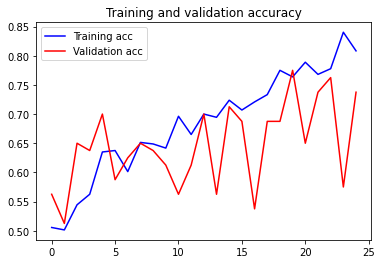

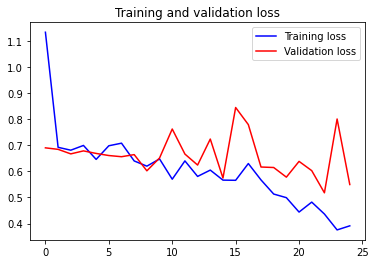

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [ ]:
model.load_weights('/content/drive/MyDrive/vish/severity/validation/25e.hdf5')

Saving Tesla.jpg to Tesla.jpg
[1.]
Damage Assessment Completed!
The Car in the image is : UNDAMAGED
The given car is : 



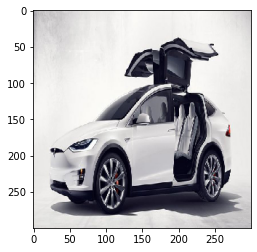

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.imshow(img)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print("Damage Assessment Completed!\nThe Car in the image is : UNDAMAGED\nThe given car is : \n")
  else:
    print("Damage Assessment Completed!\nThe Car in the image is : DAMAGED\nThe given car is : \n")
 